In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import plotly.express as px

In [137]:
accre_data =pd.read_csv('initial_data.csv')

In [138]:
accre_data.shape

(3319256, 12)

In [139]:
initial_data=accre_data.copy()

In [140]:
initial_data.shape

(3319256, 12)

In [141]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319256 entries, 0 to 3319255
Data columns (total 12 columns):
JOBID        object
ACCOUNT      object
USER         object
REQMEM       float64
USEDMEM      float64
REQTIME      int64
USEDTIME     int64
NODES        int64
CPUS         int64
PARTITION    object
EXITCODE     object
SUBMIT       object
dtypes: float64(2), int64(4), object(6)
memory usage: 303.9+ MB


In [142]:
initial_data.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [143]:
%%time 
def array_jobs(job):
    array_split=job.split('_')
    if len(array_split)==2:
        jobs=job#array_split
    else:
        jobs=0
        
    return jobs

Wall time: 0 ns


In [144]:
initial_data.JOBID=initial_data.JOBID.apply(array_jobs)

In [145]:
initial_data.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,0,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [146]:
initial_data.drop(initial_data[initial_data['JOBID']==0].index,inplace=True)

In [147]:
initial_data.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06
5,7055502_1823,discovery,serina,12288.0,7693.11,1188000,789220,1,1,production,0:0,2019-03-11T10:06:06


In [148]:
initial_data['EXITCODE'].value_counts()

0:0    2575548
Name: EXITCODE, dtype: int64

In [149]:
initial_data[['number','sub_number']]=initial_data.JOBID.str.split('_',expand=True)

In [150]:
initial_data.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,number,sub_number
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59,6983193,1880
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06,7055502,1863
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06,7055502,1800
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06,7055502,1806
5,7055502_1823,discovery,serina,12288.0,7693.11,1188000,789220,1,1,production,0:0,2019-03-11T10:06:06,7055502,1823


In [151]:
initial_data.shape

(2575548, 14)

In [152]:
#give me only data with USEDTIME <300 i.e. 5 minutes
initial_data=initial_data[initial_data.USEDTIME<300]

In [153]:
initial_data.shape

(696855, 14)

In [154]:
initial_data=initial_data.groupby(['number','USER','EXITCODE'],as_index=False)[['JOBID']].count()

In [155]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17488 entries, 0 to 17487
Data columns (total 4 columns):
number      17488 non-null object
USER        17488 non-null object
EXITCODE    17488 non-null object
JOBID       17488 non-null int64
dtypes: int64(1), object(3)
memory usage: 683.1+ KB


In [156]:
#this is the users who commited <500 jobs that were <5 minutes.
initial_data.head()

,number,USER,EXITCODE,JOBID
0,10000883,boyce,0:0,6
1,10007652,stacey,0:0,1
2,10007726,stacey,0:0,2
3,10007826,gerrit,0:0,50
4,10008050,gerrit,0:0,50


In [157]:
initial_data=initial_data[initial_data.JOBID>500]

In [158]:
initial_data.shape

(177, 4)

In [159]:
#This is the number of times each person committed that criteria
user=initial_data.groupby('USER')[['number']].count()

In [160]:
user

,number
USER,
alf,3
alisson,1
archie,2
baylee,7
benson,19
boyce,31
brande,22
demarcus,7
hjalmar,2


In [161]:
exit_code=accre_data.copy()

In [162]:
exit_code.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [163]:
#how many jobs were unsuccessful. i.e. exitcode not equal '0:0'
exit_code=exit_code[exit_code.EXITCODE!='0:0']


In [164]:
exit_code.head()


,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
16652,7269184,atemoyas,benson,1024.0,1023.83,1500,1435,1,1,production,0:125,2019-03-21T18:38:42
23910,7281699,pinole,christa,1024.0,430.72,1800,41,2,1,production,7:0,2019-03-22T08:37:35
24000,7281822,pinole,christa,6144.0,0.00,1800,22,1,1,production,7:0,2019-03-22T08:47:42
24274,7282440,blood,jonnie,12288.0,0.18,1800,19,2,1,production,7:0,2019-03-22T09:36:29
24394,7282671,pinole,christa,1024.0,0.16,1800,31,2,1,production,7:0,2019-03-22T10:06:30


In [165]:
exit_code.shape

(105, 12)

In [166]:
#shows the accounts and user of each account and how many jobs they committed that failed. 
exit_code.groupby(['ACCOUNT','USER'])[['JOBID']].count()

,,JOBID
ACCOUNT,USER,
atemoyas,benson,1
baby,christina,1
blood,jonnie,4
carrot,ari,1
cep,tremaine,1
cepuna,luvinia,1
chanterelle,adalyn,2
durondeau,ginger,9
forelle,cleva,5


In [167]:
#bring in the clean data again and work on part-2 of question one. Answering the within 4 hours mark
within_4_hours=accre_data.copy()

In [168]:

within_4_hours.shape

(3319256, 12)

In [169]:
within_4_hours.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [170]:
#converted the submit section to datetime type
within_4_hours['SUBMIT']=pd.to_datetime(within_4_hours.SUBMIT)

In [171]:
within_4_hours.head(2)

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09 16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07 18:39:59


In [172]:
within_4_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319256 entries, 0 to 3319255
Data columns (total 12 columns):
JOBID        object
ACCOUNT      object
USER         object
REQMEM       float64
USEDMEM      float64
REQTIME      int64
USEDTIME     int64
NODES        int64
CPUS         int64
PARTITION    object
EXITCODE     object
SUBMIT       datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 303.9+ MB


In [173]:
rolling_jobs=within_4_hours[within_4_hours.USEDTIME<300]

In [174]:
rolling_jobs.shape

(822925, 12)

In [175]:
rolling_jobs=rolling_jobs.sort_values('SUBMIT')

In [176]:
#rolling_jobs=within_4_hours.groupby('USER').rolling(on='SUBMIT',window='4H').JOBID.count()
rolling_jobs=rolling_jobs.groupby('USER').rolling(on='SUBMIT',window='4h').JOBID.count()

In [177]:
rolling_jobs.shape

(822925,)

In [178]:

rolling_jobs.head()

USER     SUBMIT             
abigail  2019-03-26 15:27:33    1.0
         2019-03-27 03:38:27    1.0
         2019-03-27 11:13:51    1.0
         2019-03-27 11:20:34    2.0
         2019-03-29 11:57:09    1.0
Name: JOBID, dtype: float64

In [179]:
rolling_jobs=rolling_jobs[rolling_jobs>500]

In [180]:
rolling_jobs.head()

USER     SUBMIT             
adelina  2019-04-04 14:38:14    501.0
         2019-04-04 14:38:14    502.0
         2019-04-04 14:38:14    503.0
         2019-04-04 14:38:14    504.0
         2019-04-04 14:38:15    505.0
Name: JOBID, dtype: float64

In [181]:
rolling_jobs.shape

(542007,)

In [182]:
#convert rolling jobs to dataframe
rolling_data=pd.DataFrame(rolling_jobs)

In [183]:
#this answers the question 1 part 2. the number of users who committed small jobs at short time within 4 hours
d={'JOBID':'JOB_COUNT'}
rolling_data=rolling_data.groupby('USER')[['JOBID']].max().rename(columns=d)

In [184]:
#the highest number of jobs that this user ever submited within a 4 hour period i.e job_count
rolling_data.sort_values(by='JOB_COUNT', ascending=False)#ascending=false does greater to least

,JOB_COUNT
USER,
demarcus,23759.0
whitley,21015.0
mikala,13259.0
benson,12287.0
baylee,10729.0
leva,8100.0
boyce,7648.0
brande,7167.0
shiela,6363.0


In [185]:

rolling_data.count()

JOB_COUNT    47
dtype: int64

# Question 3

In [186]:
# starting Question 3
accre_cleaned=accre_data.copy()

In [187]:
# keeping column with NODES =1
accre_cleaned=accre_cleaned[accre_cleaned.NODES==1]

In [188]:
# keeping column with value for EXITCODE=0:0
accre_cleaned=accre_cleaned[accre_cleaned.EXITCODE=='0:0']

In [189]:
accre_cleaned.shape

(3315147, 12)

In [190]:
accre_cleaned.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [191]:
#dummy=accre_cleaned.head(10000)

In [192]:
# keeping column with value for EXITCODE=0:0
#accre_cleaned=accre_cleaned[accre_cleaned.EXITCODE=='0:0']

In [193]:
accre_cleaned.shape

(3315147, 12)

In [194]:
accre_cleaned.ACCOUNT.nunique()

111

In [195]:
#calculating percent memory used
def percent_used(x,y):
    """calculating percentage from two columns"""
    return (y/x)*100

In [196]:
#grouping by account and agrregating by total REQMEM , USEDMEM , USEDTIME
#accre_cleaned_sum=accre_cleaned.groupby('ACCOUNT').agg({'REQMEM':sum,'USEDMEM':sum,'USEDTIME':sum})


In [197]:
#accre_cleaned_sum.head()

In [198]:
#accre_cleaned_sum['TPUSED']=accre_cleaned_sum.apply(lambda row:percent_used(row['REQMEM'],row['USEDMEM']),axis=1)

In [199]:
#accre_cleaned_sum=accre_cleaned_sum.sort_values('TPUSED', ascending=False)

In [200]:
accre_cleaned.shape

(3315147, 12)

In [201]:
# Average requested and used memory, sum total of used memory
#accre_cleaned_average= accre_cleaned.groupby('ACCOUNT')['REQMEM','USEDMEM','USEDTIME'].mean()

d={'REQMEM':'AVREQMEM','USEDMEM':'AVUSEDMEM'}
accre_cleaned_average=accre_cleaned.groupby('ACCOUNT',as_index=False).agg({'REQMEM':'mean','USEDMEM':'mean'}).rename(columns=d)

In [202]:
accre_cleaned_average.head()

,ACCOUNT,AVREQMEM,AVUSEDMEM
0,alkmene,11553.681629,3550.096961
1,almonds,4593.089043,692.240520
2,amaranth,9409.086170,772.543185
3,antares,6040.981151,1165.408642
4,arra,9580.331210,3989.739413


In [203]:
accre_cleaned_average['PERCENTUSED']=accre_cleaned_average.apply(lambda row:percent_used(row['AVREQMEM'],row['AVUSEDMEM']),axis=1)

In [205]:
accre_cleaned_average=accre_cleaned_average.sort_values('PERCENTUSED', ascending=False).reset_index(drop=True)

In [206]:
#accre_cleaned_average

In [207]:
#Dropping Account having average percent higher then 100
accre_cleaned_average_drop=accre_cleaned_average.loc[accre_cleaned_average['PERCENTUSED']<100.01]

In [208]:
accre_cleaned_average_drop.shape

(110, 4)

In [209]:
#rounding decimal places to 2
accre_cleaned_average_drop=accre_cleaned_average_drop.round({'AVREQMEM':2,'AVUSEDMEM':2,'PERCENTUSED':2})

In [210]:
#shows the table with average percent used by each group
accre_cleaned_average_drop

,ACCOUNT,AVREQMEM,AVUSEDMEM,PERCENTUSED
1,shiny,15387.55,13863.00,90.09
2,cep,18928.33,15767.74,83.30
3,spring,10775.94,8696.35,80.70
4,shell,14297.60,9286.89,64.95
5,blackberries,4029.22,2332.06,57.88
6,winged,15075.02,8389.15,55.65
7,mixed,8060.60,4436.10,55.03
8,large,1581.97,850.68,53.77
9,opo,10240.00,5368.16,52.42
10,kinnow,15580.59,7709.81,49.48


In [211]:
#table(ax, accre_cleaned_average, rowLabels=['']*accre_cleaned_average.shape[0],loc='center')

In [212]:
#plt.bar(accre_cleaned_average['ACCOUNT'],accre_cleaned_average['AVPUSED']) 

#plt.figure( figsize=(110, 10), dpi=250)

In [213]:
def ranking(column):
    if column['PERCENTUSED']>=49.99:
        val='High'
    elif column['PERCENTUSED']>=29.99:
        val='Medium'
    else:
        val='Low'
    return val



In [214]:
#accre_cleaned_average_drop['Group_Ranking']=accre_cleaned_average_drop.apply(ranking,axis=1)

In [215]:
accre_cleaned_average_drop.tail()

,ACCOUNT,AVREQMEM,AVUSEDMEM,PERCENTUSED
106,mignonette,12800.0,1.17,0.01
107,minnewashta,4000.0,0.06,0.00
108,sunflower,1536.0,0.00,0.00
109,sugranineteen,2048.0,0.00,0.00
110,golden,2048.0,0.00,0.00


In [216]:
#pivoted=accre_cleaned_average_drop.pivot(index ='ACCOUNT',columns='Group_Ranking',values='PERCENTUSED')\
  #                           .reset_index()


In [217]:
#pivoted.columns.name=None
#print(pivoted)

In [218]:
#accre_cleaned_average.groupby(['Group_Ranking','ACCOUNT','PERCENTUSED'])['PERCENTUSED'].count()

In [219]:
high=accre_cleaned_average_drop.loc[accre_cleaned_average_drop['PERCENTUSED']>10]

In [220]:
print(high)

         ACCOUNT  AVREQMEM  AVUSEDMEM  PERCENTUSED
1          shiny  15387.55   13863.00        90.09
2            cep  18928.33   15767.74        83.30
3         spring  10775.94    8696.35        80.70
4          shell  14297.60    9286.89        64.95
5   blackberries   4029.22    2332.06        57.88
6         winged  15075.02    8389.15        55.65
7          mixed   8060.60    4436.10        55.03
8          large   1581.97     850.68        53.77
9            opo  10240.00    5368.16        52.42
10        kinnow  15580.59    7709.81        49.48
11        pecans   8069.89    3632.56        45.01
12          arra   9580.33    3989.74        41.65
13        leaves   2610.11    1083.15        41.50
14     discovery  10535.87    4300.24        40.82
15          polk  35818.19   14459.22        40.37
16    brazilnuts  15993.81    6251.13        39.08
17          hass   4188.33    1597.04        38.13
18  strawberries   4118.58    1446.30        35.12
19           wax   8989.66    3

In [221]:
low=accre_cleaned_average_drop.loc[accre_cleaned_average['PERCENTUSED']<9.99].reset_index(drop=True)

In [222]:
print(low)

          ACCOUNT  AVREQMEM  AVUSEDMEM  PERCENTUSED
0          jicama   1509.73     149.83         9.92
1            bell   5570.97     549.49         9.86
2           basil  10479.77    1032.84         9.86
3        pioppino   3462.04     339.63         9.81
4        atemoyas   2526.57     244.35         9.67
5          mickey   9857.47     927.57         9.41
6           white   4915.20     453.80         9.23
7       champagne  14785.58    1360.78         9.20
8          garlic  16164.85    1487.67         9.20
9        maltaise   5010.92     459.96         9.18
10         pinova   8440.40     755.83         8.95
11          lollo   1927.53     168.51         8.74
12       amaranth   9409.09     772.54         8.21
13         casaba   2722.91     216.73         7.96
14         cepuna  12892.16     972.35         7.54
15       galangal  11747.63     790.13         6.73
16         celery   6430.95     419.57         6.52
17            foo  12288.00     794.18         6.46
18          

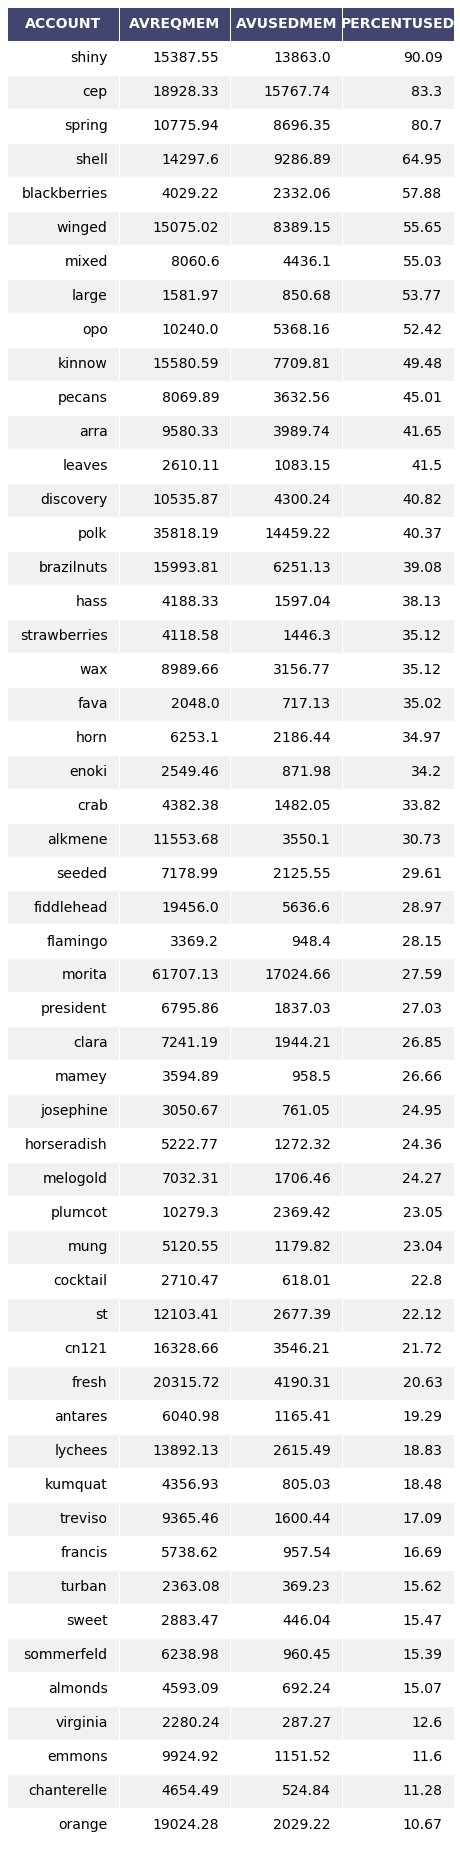

In [223]:
# Creating table gor accounts using more than 10%
import six
def render_mpl_table(data, col_width=12, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
render_mpl_table(high, header_columns=0, col_width=2.0)
plt.savefig('table_high.png');

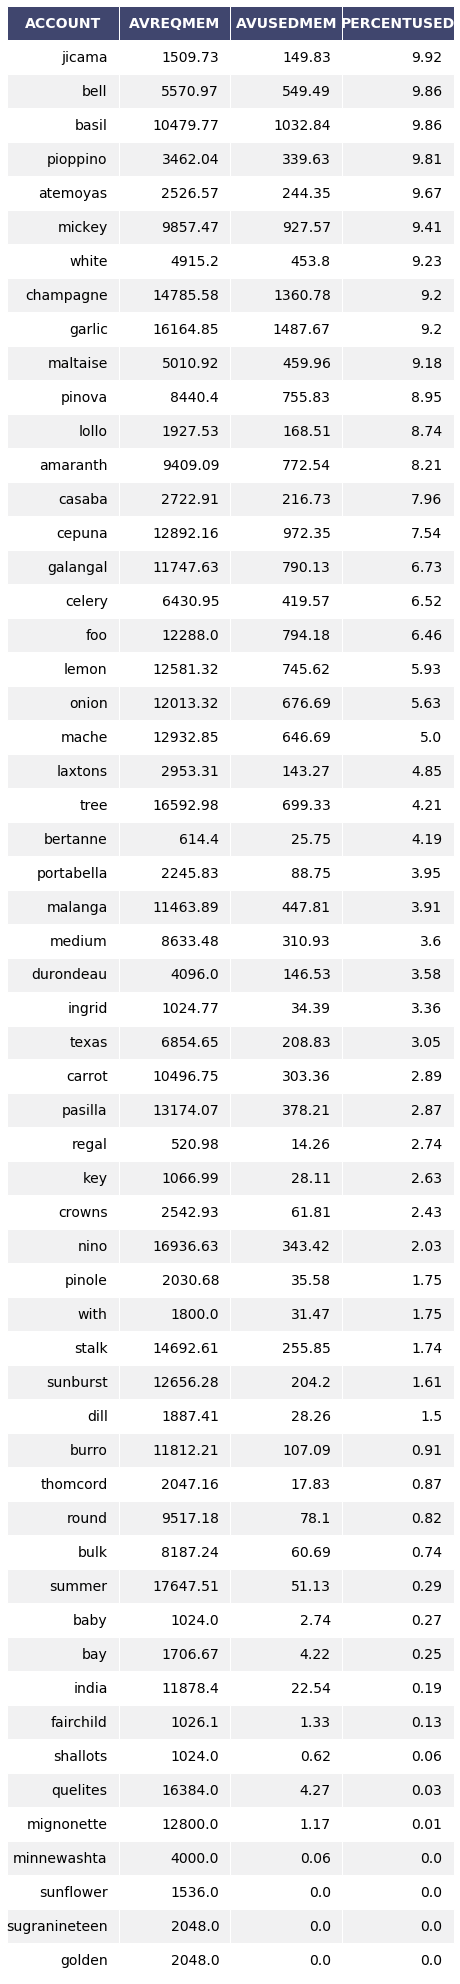

In [224]:
# Creating table for accounts using more less 10%
import six
def render_mpl_table(data, col_width=12, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
render_mpl_table(low, header_columns=0, col_width=2.0)
plt.savefig('table_low.png');

In [236]:
data=accre_cleaned_average_drop.loc[accre_cleaned_average_drop['PERCENTUSED']>=50]

fig=px.bar(data, x='ACCOUNT',y='PERCENTUSED', color='PERCENTUSED'_d,
          labels={'ACCOUNT':'Group','PERCENTUSED':'Percentage'})
fig.update_layout(title='Top Nine Memory User Groups')

fig.show();

SyntaxError: invalid syntax (<ipython-input-236-4ce2a38e017d>, line 3)

In [226]:
data=accre_cleaned_average_drop

fig=px.bar(data, x='ACCOUNT',y='PERCENTUSED', color='PERCENTUSED',
          labels={'ACCOUNT':'Group','PERCENTUSED':'Percentage'})
fig.update_layout(title='Percent Memory Used by Groups')


fig.show();

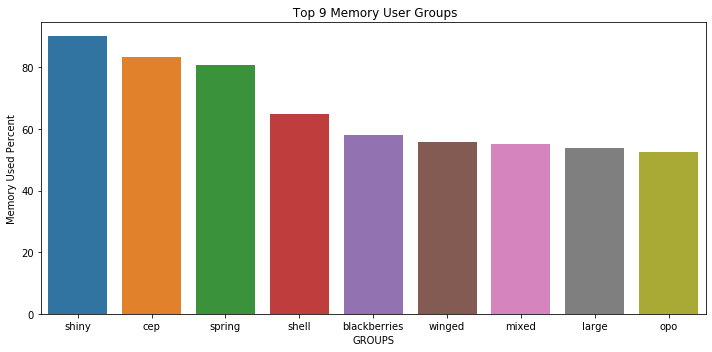

In [227]:
plt.figure(figsize=(10,5))
sns.barplot(x='ACCOUNT',y='PERCENTUSED',data=accre_cleaned_average_drop.loc[accre_cleaned_average_drop['PERCENTUSED']>=50])
plt.xlabel("GROUPS")
plt.ylabel("Memory Used Percent")
plt.title(" Top 9 Memory User Groups")
plt.tight_layout()
plt.savefig('Accre_drop.png', dpi = 250);

In [228]:
accre_cleaned_average_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1 to 110
Data columns (total 4 columns):
ACCOUNT        110 non-null object
AVREQMEM       110 non-null float64
AVUSEDMEM      110 non-null float64
PERCENTUSED    110 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.3+ KB


In [229]:
accre_cleaned_average_drop.describe()

,AVREQMEM,AVUSEDMEM,PERCENTUSED
count,110.000000,110.000000,110.000000
mean,8528.657909,1872.101091,18.226455
std,7849.663060,3251.137722,19.567768
min,520.980000,0.000000,0.000000
25%,2763.050000,154.500000,3.127500
50%,6943.480000,750.725000,9.860000
75%,12080.887500,1804.387500,27.450000
max,61707.130000,17024.660000,90.090000


In [230]:
accre_new=pd.merge(accre_cleaned,accre_cleaned_average_drop,on=['ACCOUNT'])
accre_new.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,AVREQMEM,AVUSEDMEM,PERCENTUSED
0,6794220,laxtons,mikala,15488.0,7201.070,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44,2953.31,143.27,4.85
1,7241341,laxtons,mina,15360.0,1.160,1209600,1062573,1,1,production,0:0,2019-03-20T08:58:27,2953.31,143.27,4.85
2,7264927_6,laxtons,hazel,16431.8,0.560,10800,171,1,5,production,0:0,2019-03-21T14:48:00,2953.31,143.27,4.85
3,7264927_1,laxtons,hazel,16431.8,0.810,10800,266,1,5,production,0:0,2019-03-21T14:48:00,2953.31,143.27,4.85
4,7264927_2,laxtons,hazel,16431.8,0.572,10800,192,1,5,production,0:0,2019-03-21T14:48:00,2953.31,143.27,4.85


In [231]:
 #accre_new.groupby(['ACCOUNT','PERCENTUSED'])['USER'].sort_values(by='PERCENTUSED', ascending=False)
    #agg({'PERCENTUSED':'mean','USEDMEM':'mean'})


In [232]:
plt.figure(figsize=(10,5))
sns.barplot(x='ACCOUNT',y='PERCENTUSED',data='accre_new.loc[aacre_new['PERCENTUSED']>60])
plt.xlabel("GROUPS")
plt.ylabel("Memory Used Percent")
plt.title("Five Best Memory User Groups")
plt.tight_layout()
plt.savefig('Accre1.png', dpi = 250);

SyntaxError: invalid syntax (<ipython-input-232-e64a7d364072>, line 2)

# Question 4

In [ ]:
accre_cleaned_percent=accre_cleaned.copy()

In [ ]:
accre_cleaned_percent.shape


In [ ]:
accre_cleaned_percent.head()

In [ ]:
accre_cleaned_percent['PERCENTUSED']= ((accre_cleaned_percent.USEDMEM)/(accre_cleaned_percent.REQMEM))*100

In [ ]:
accre_cleaned_percent.head()

In [ ]:
accre_cleaned_percent=accre_cleaned_percent.sort_values('PERCENTUSED', ascending=False)

In [ ]:
accre_cleaned_percent.head(2)

In [ ]:
#check one of the users.throw it out!maybe
#remove blood account bc they are using more memory than requried 
accre_cleaned_percent[accre_cleaned_percent.ACCOUNT=='blood']

In [ ]:
accre_cleaned_percent.shape

In [ ]:
accre_cleaned_percent['PERCENTUSED'].mean()

In [ ]:
accre_cleaned_percent['USEDTIME'].mean()

In [ ]:
# definition for weighted average
def wavg(x,y,z):

    d = x[y]
    w = x[z]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
      return d.mean()

In [ ]:
#accre_cleaned_percent['w_avg']= accre_cleaned_percent.groupby('ACCOUNT').apply(wavg,'PERCENTUSED','USEDTIME')

In [ ]:
accre_cleaned_percent.info()

In [ ]:
w_avg=accre_cleaned_percent.groupby('ACCOUNT').apply(wavg,'PERCENTUSED','USEDTIME')

In [ ]:

w_avg = pd.DataFrame(w_avg)

In [ ]:
w_avg

In [ ]:
#accre_cleaned_weighted=accre_cleaned_percent.groupby('ACCOUNT',as_index=False).agg({'w_avg':'sum'})

In [ ]:
accre_cleaned_weighted.head()